In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Step 1: Load the dataset
data = pd.read_csv("student_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [5]:
data.head()

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


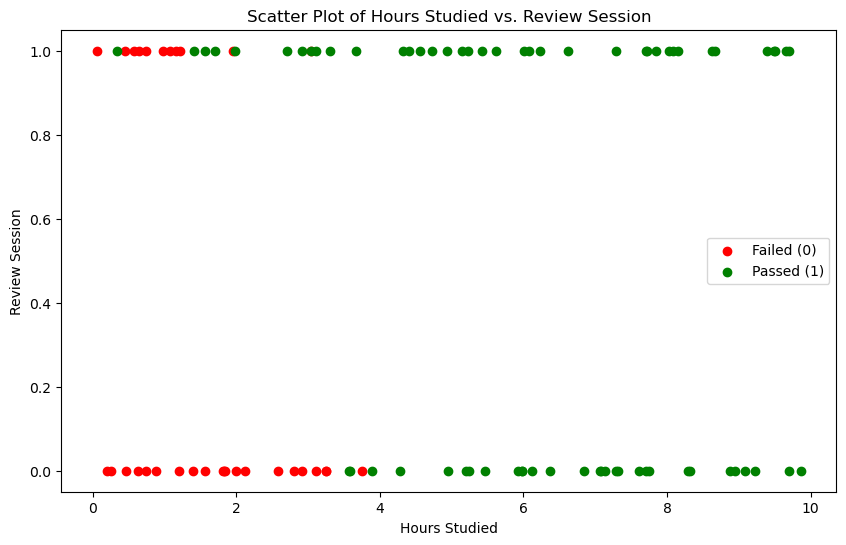

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student_data.csv")

# Assuming the columns are named 'Hours_Studied', 'Review_Session', and 'Results'
plt.figure(figsize=(10, 6))

# Scatter plot for "Failed" (Results=0) points in red
plt.scatter(data[data['Results'] == 0]['Hours_Studied'], data[data['Results'] == 0]['Review_Session'], color='red', label='Failed (0)')

# Scatter plot for "Passed" (Results=1) points in green
plt.scatter(data[data['Results'] == 1]['Hours_Studied'], data[data['Results'] == 1]['Review_Session'], color='green', label='Passed (1)')

plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.legend(loc='best')
plt.title('Scatter Plot of Hours Studied vs. Review Session')
plt.show()



In [18]:
# Define the features and target
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

C:\Users\NIKHIL CHAGANTI\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\NIKHIL CHAGANTI\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


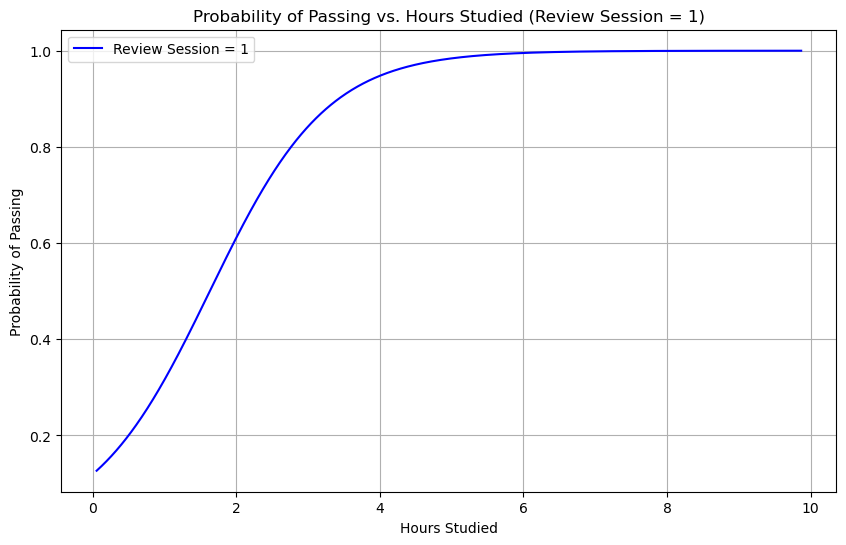

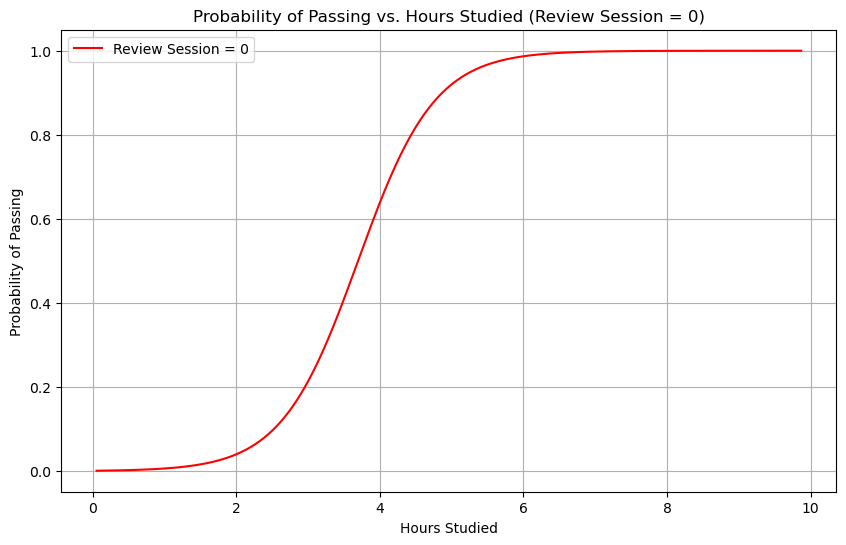

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv("student_data.csv")

# Create and fit a logistic regression model
model = LogisticRegression()

# Generate data points for plotting
hours_studied_values = np.linspace(data['Hours_Studied'].min(), data['Hours_Studied'].max(), 1000)

# Filter data for Review Session = 1
data_review_session_1 = data[data['Review_Session'] == 1]
X_review_session_1 = data_review_session_1[['Hours_Studied']]
y_review_session_1 = data_review_session_1['Results']
model.fit(X_review_session_1, y_review_session_1)
probabilities_review_session_1 = model.predict_proba(hours_studied_values.reshape(-1, 1))[:, 1]

# Filter data for Review Session = 0
data_review_session_0 = data[data['Review_Session'] == 0]
X_review_session_0 = data_review_session_0[['Hours_Studied']]
y_review_session_0 = data_review_session_0['Results']
model.fit(X_review_session_0, y_review_session_0)
probabilities_review_session_0 = model.predict_proba(hours_studied_values.reshape(-1, 1))[:, 1]

# Create separate graphs
plt.figure(figsize=(10, 6))
plt.plot(hours_studied_values, probabilities_review_session_1, color='blue', label='Review Session = 1')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Probability of Passing vs. Hours Studied (Review Session = 1)')
plt.grid()
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(hours_studied_values, probabilities_review_session_0, color='red', label='Review Session = 0')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Probability of Passing vs. Hours Studied (Review Session = 0)')
plt.grid()
plt.legend()

plt.show()


C:\Users\NIKHIL CHAGANTI\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\NIKHIL CHAGANTI\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


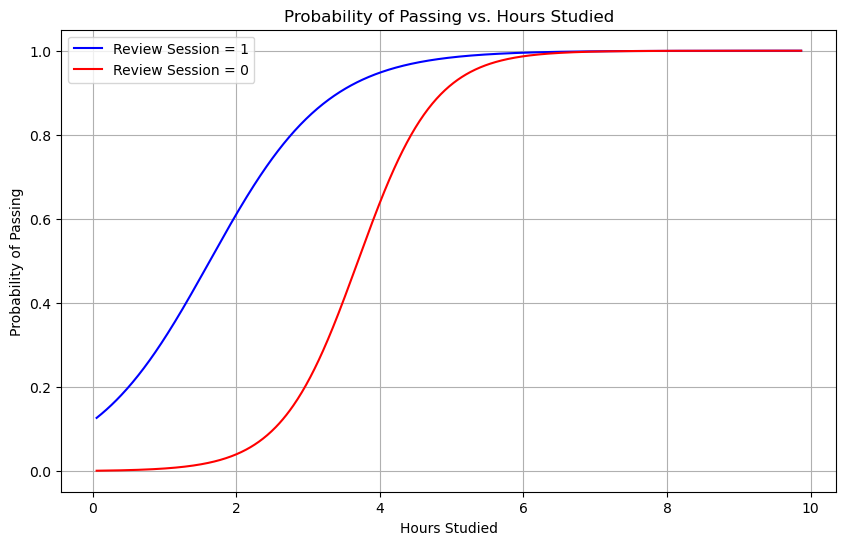

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv("student_data.csv")

# Create and fit a logistic regression model
model = LogisticRegression()

# Generate data points for plotting
hours_studied_values = np.linspace(data['Hours_Studied'].min(), data['Hours_Studied'].max(), 1000)

# Filter data for Review Session = 1
data_review_session_1 = data[data['Review_Session'] == 1]
X_review_session_1 = data_review_session_1[['Hours_Studied']]
y_review_session_1 = data_review_session_1['Results']
model.fit(X_review_session_1, y_review_session_1)
probabilities_review_session_1 = model.predict_proba(hours_studied_values.reshape(-1, 1))[:, 1]

# Filter data for Review Session = 0
data_review_session_0 = data[data['Review_Session'] == 0]
X_review_session_0 = data_review_session_0[['Hours_Studied']]
y_review_session_0 = data_review_session_0['Results']
model.fit(X_review_session_0, y_review_session_0)
probabilities_review_session_0 = model.predict_proba(hours_studied_values.reshape(-1, 1))[:, 1]

# Create a single graph with different colors for each line
plt.figure(figsize=(10, 6))
plt.plot(hours_studied_values, probabilities_review_session_1, color='blue', label='Review Session = 1')
plt.plot(hours_studied_values, probabilities_review_session_0, color='red', label='Review Session = 0')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Probability of Passing vs. Hours Studied')
plt.grid()
plt.legend()

plt.show()


Coefficients: [[1.1947181]]
Intercept: [-3.25064923]
Accuracy: 0.87
ROC AUC Score: 0.8465073529411764


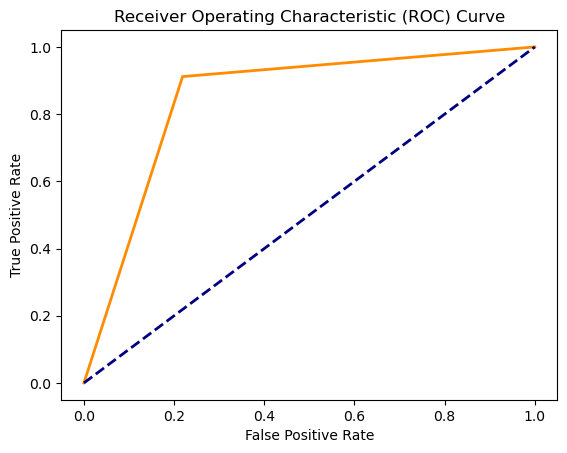

In [25]:
# Model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y, y_pred)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


In [42]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Assuming 'X' contains your features and 'y' is your target variable
X = data.drop('Results', axis=1)  # Replace 'target_variable' with your actual target column name
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (1) Fit an SVM model with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Make predictions on the test set
linear_svm_predictions = linear_svm.predict(X_test)

# Calculate accuracy
linear_svm_accuracy = accuracy_score(y_test, linear_svm_predictions)
print("Accuracy (Linear SVM):", linear_svm_accuracy)


Accuracy (Linear SVM): 0.85


In [40]:
# Fit a Support Vector Machine model with an RBF kernel using Grid Search
rbf_svm = SVC(kernel='rbf')
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_gamma = grid_search.best_params_['gamma']
best_c = grid_search.best_params_['C']

# Fit the RBF SVM with the best hyperparameters
best_rbf_svm = SVC(kernel='rbf', C=best_c, gamma=best_gamma)
best_rbf_svm.fit(X_train, y_train)
y_pred_rbf = best_rbf_svm.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF Kernel SVM Accuracy:", accuracy_rbf)
print("Best gamma:", best_gamma)
print("Best C:", best_c)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.